In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/test-set-sample/test 2.jpg
/kaggle/input/test-set-sample/test 3.jpg
/kaggle/input/test-set-sample/test 1.jpg


Reading training and testing dataset

In [2]:
train= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.shape
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.shape
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dropping label column from x_train dataset and adding it in y_train 

In [4]:
y_train= train['label']
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
x_train= train.drop(labels='label',axis=1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualizing the count of numbers

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

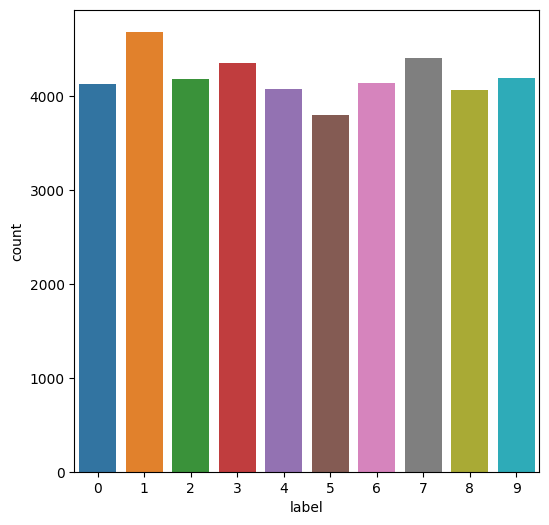

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
count= sns.countplot(x=y_train)
y_train.value_counts()

To see a sample image

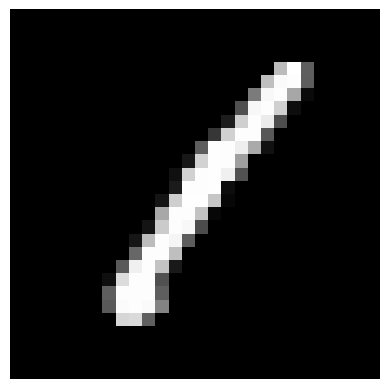

In [7]:
image=x_train.iloc[0]
# Convert the dataset to a 2D numpy array
image_array = image.to_numpy()

# Reshape the 1D array to a 2D image (e.g., 5x5 pixels)
image_shape = (28, 28) #this is based on 784 values which is from 28x28
image = image_array.reshape(image_shape)

# Display the image
plt.imshow(image, cmap='gray') 
#The cmap parameter specifies the color map to be used for displaying the image. In this case, 'gray' indicates that the image should be displayed in grayscale (black and white).
plt.axis('off')  # Hide axes
plt.show()


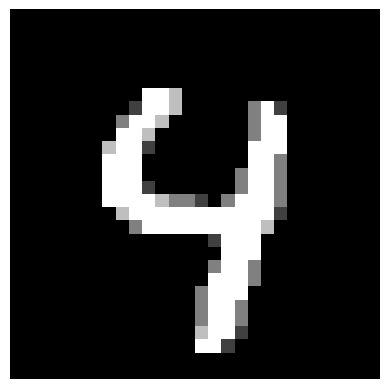

In [8]:
image=x_train.iloc[78]
# Convert the dataset to a 2D numpy array
image_array = image.to_numpy()

# Reshape the 1D array to a 2D image (e.g., 5x5 pixels)
image_shape = (28, 28) #this is based on 784 values which is from 28x28
image = image_array.reshape(image_shape)

# Display the image
plt.imshow(image, cmap='gray') 
#The cmap parameter specifies the color map to be used for displaying the image. In this case, 'gray' indicates that the image should be displayed in grayscale (black and white).
plt.axis('off')  # Hide axes
plt.show()


# Normalization, Reshape and Label Encoding
## Normalization:
**Purpose**: Normalization ensures that pixel values are within a consistent range, typically between 0 and 1 or -1 and 1.

**Reasons**:
* **Stabilizes Training**: Normalizing pixel values prevents large variations in input data, which can lead to unstable training. It helps the model converge faster and more reliably.
* **Gradient Descent**: Gradient descent optimization algorithms work better when features are on a similar scale.
* **Activation Functions**: Some activation functions (e.g., sigmoid, tanh) perform better with normalized inputs.
* **Example**: Divide pixel values by 255 to scale them between 0 and 1.

## Reshaping:
**Purpose**: Images are typically represented as 2D arrays (height x width x channels). CNNs expect a specific input shape.

**Reasons**:
* **Input Shape**: CNNs require a consistent input shape (e.g., (height, width, channels)).
* **Flattening**: If using fully connected layers after CNN layers, reshaping is necessary to flatten the 2D feature maps into a 1D vector.
* **Example**: Reshape a grayscale image (28x28 pixels) to (28, 28, 1) or an RGB image (28x28x3) to (28, 28, 3).

## Label Encoding:
**Purpose**: Convert categorical labels (classes) into numerical representations.

**Reasons**:
* **Model Input**: CNNs require numerical labels for training.
* **Loss Calculation**: Loss functions (e.g., cross-entropy) compare predicted class probabilities with true labels.
* **Example**: Encode class labels (e.g., “cat,” “dog,” “bird”) as integers (e.g., 0, 1, 2).

2 => [0,0,1,0,0,0,0,0,0,0]

4 => [0,0,0,0,1,0,0,0,0,0]

### Can We Proceed Without These Steps?

* Technically, you can train a CNN without normalization, reshaping, or label encoding, but it’s not recommended.
* Skipping normalization may lead to slow convergence or poor performance.
* Skipping reshaping will cause shape mismatches between input data and model architecture.
* Skipping label encoding will result in incorrect loss calculations and misinterpretation of class probabilities.



In [9]:
#normalize

x_train=x_train/255.0 
test=test/255.0 

In [10]:
#reshape

x_train=x_train.to_numpy()
test=test.to_numpy()

x_train=x_train.reshape(-1,28,28,1)
#(batch_size, height, width, channels)
#The batch size affects how gradients are computed during backpropagation. It impacts the stability and speed of training.
test=test.reshape(-1,28,28,1)

print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [11]:
#encoding
import keras
from keras.utils import to_categorical  # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

2024-05-06 10:24:33.517374: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 10:24:33.517497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 10:24:33.700205: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Test train split
Since we have aready have split data, the reason we split up here is to use it for validating.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2) #splitting 80-20

print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (33600, 28, 28, 1)
x_test shape (8400, 28, 28, 1)
y_train shape (33600, 10)
y_test shape (8400, 10)


# Training and evaluation

* Create models with layers
* Compile model
* Fit model
* Evaluate the model

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Creating CNN model with layers

In [14]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
#fully connected layer
model.add(Flatten())
model.add(Dense(128,'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,'softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Initializing the optimizer

In [15]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

**learning_rate** specifies the learning rate for the optimizer, **beta_1** and **beta_2** are the exponential decay rates for the moment estimates, and **epsilon** is a small value added to the denominator for numerical stability. 

These values are the defaults used in TensorFlow's implementation of Adam, but you can adjust them based on your specific needs and the characteristics of your model and dataset.

### Compiling the model 

In [16]:
# Compile the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#categorical_crossentropy--->It generalizes binary cross-entropy to multiple classes. 
#The model predicts class probabilities for each category, and the loss is minimized based on the true class probabilities 1.

The **metrics** argument expects a **list of strings**, even if you’re specifying only one metric. So, always use the list format to ensure proper functionality. 

Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [17]:
epochs=10
batch_size=250

## Data Augumentation

 Data augmentation supplements the creation of data variations that can help a model improve the accuracy of its predictions.
 
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

### Fitting the model



In [19]:
# Fit the model

train_iterator = datagen.flow(x_train, y_train, batch_size=batch_size)

"""This line creates an iterator for data augmentation using the ImageDataGenerator (datagen).
It generates augmented batches of training data.
The x_train and y_train are the input features (images) and corresponding labels (target values) for your training dataset.
The batch_size determines how many samples are processed at once in each batch."""


# Train your model
history = model.fit(train_iterator,epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=len(x_train) // batch_size)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 26s 177ms/step - accuracy: 0.5749 - loss: 1.2728 - val_accuracy: 0.9585 - val_loss: 0.1396
Epoch 2/10
  1/134 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.8880 - loss: 0.3254

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8880 - loss: 0.3254 - val_accuracy: 0.9575 - val_loss: 0.1379
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.9194 - loss: 0.2614 - val_accuracy: 0.9730 - val_loss: 0.0944
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9600 - loss: 0.1442 - val_accuracy: 0.9719 - val_loss: 0.0942
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 26s 191ms/step - accuracy: 0.9466 - loss: 0.1747 - val_accuracy: 0.9804 - val_loss: 0.0662
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9600 - loss: 0.1554 - val_accuracy: 0.9805 - val_loss: 0.0659
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 177ms/step - accuracy: 0.9563 - loss: 0.1405 - val_accuracy: 0.9825 - val_loss: 0.0554
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9600 - loss: 0.1172 - val_accuracy: 0.9820 - val_loss: 0.0552
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.9633 - loss: 0.1233 - val_accurac

Converting the results saved as dataset


The **keras.callbacks.History** (which we saved here as **history**)object returned by the model.fit() method contains information about the training process, including metrics such as loss and accuracy recorded at each epoch. To access the contents inside the History object, you can use the following methods:

**Accessing Training Metrics:**
The **History** object contains a dictionary called **history** that holds the training metrics.

In [20]:
history_df= pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.747886,0.777865,0.958452,0.139558
1,0.888000,0.325391,0.957500,0.137918
2,0.927586,0.233054,0.972976,0.094368
3,0.960000,0.144216,0.971905,0.094197
4,0.949145,0.165840,0.980357,0.066190
5,0.960000,0.155396,0.980476,0.065941
6,0.957121,0.137586,0.982500,0.055388
7,0.960000,0.117154,0.982024,0.055189
8,0.963178,0.120336,0.985357,0.049382
9,0.972000,0.072161,0.984405,0.050522


Plotting the **Training and Validation accuracy and loss**

Best Validation Loss: 0.0494
Best Validation Accuracy: 0.9854


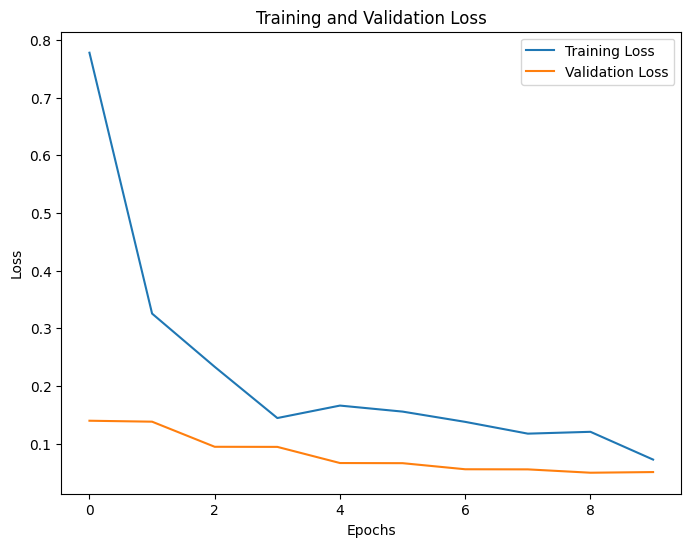

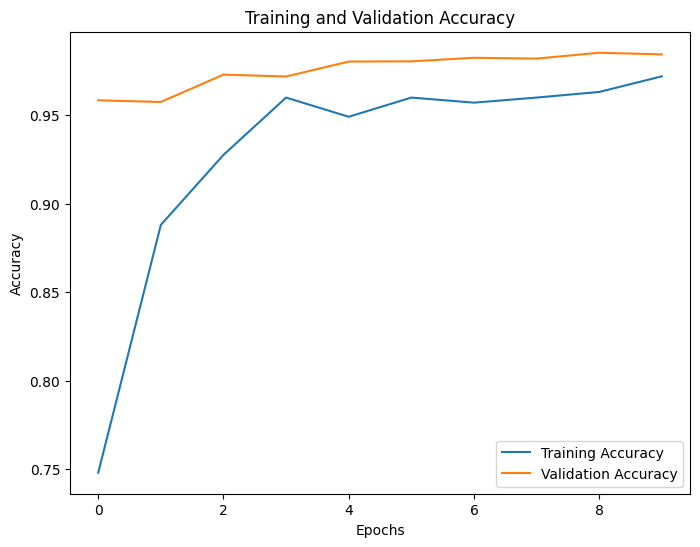

In [21]:


print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))


plt.figure(figsize=(8, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




### Testing with new samples

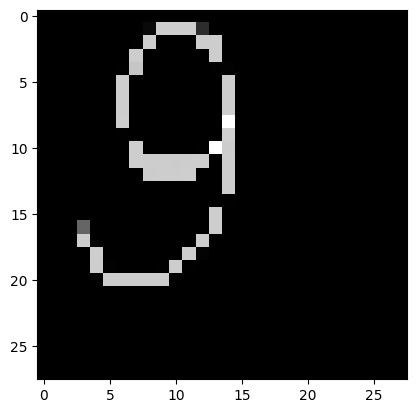

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Digit: 4


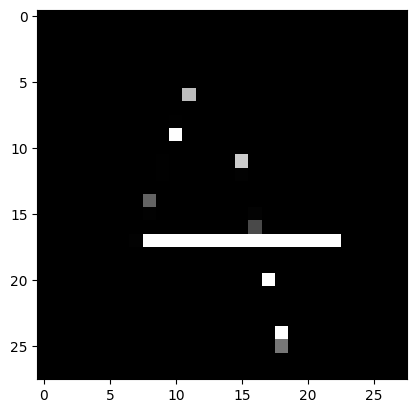

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 2


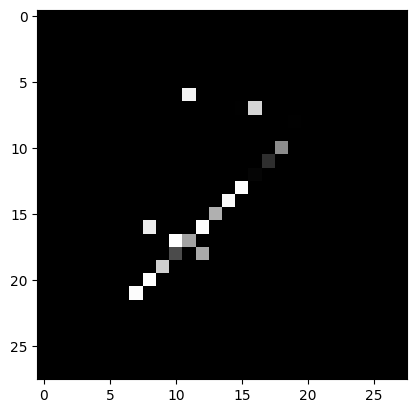

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Digit: 7


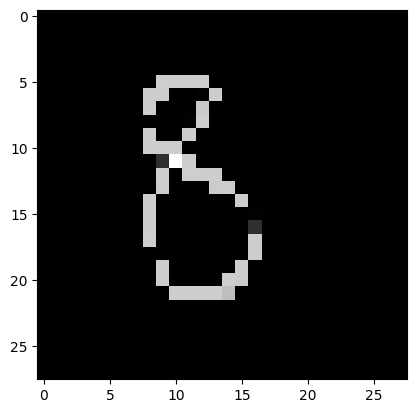

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Digit: 8


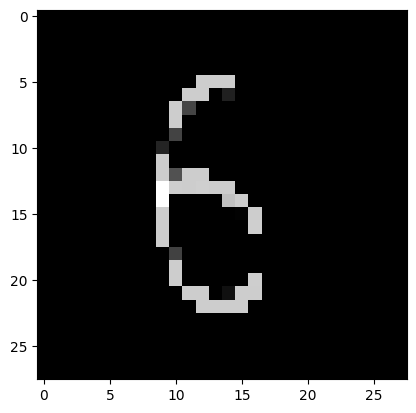

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 8


In [117]:
import cv2
# Load the sample image

for i in range(1, 6):  # Assuming you have images named test1.jpg, test2.jpg, ..., test5.jpg
    # Construct the filename for the current image
    image_path = f'/kaggle/input/sample-test-set/test {i}.jpg'
    test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Replace 'sample_image.jpg' with your image file path


    # Preview sample image
    plt.imshow(test_image, cmap='gray')

    # Format Image
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    # Preview reformatted image
    plt.imshow(img_resized, cmap='gray')
    plt.show()

    # Prepare the image for prediction
    input_image = img_resized.reshape(1, 28, 28, 1)  # Reshape to match the input format of your model
    input_image = input_image.astype('float32') / 255  # Normalize the pixel values

    prediction = model.predict(input_image)
    predicted_digit = np.argmax(prediction)

    print("Predicted Digit:", predicted_digit)

Out of 5 test samples, it was able to identify only 2 correctly